In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df_gems = pd.read_csv('cubic_zirconia.csv')

In [8]:
df_gems.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df_gems.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [10]:
df_gems.shape

(26967, 11)

In [11]:
df_gems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [12]:
df_gems.describe(include = 'all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [13]:
duplicate=df_gems.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


In [14]:
df_gems.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [15]:
df_gems[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

In [16]:
df_gems.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [17]:
df_gems.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

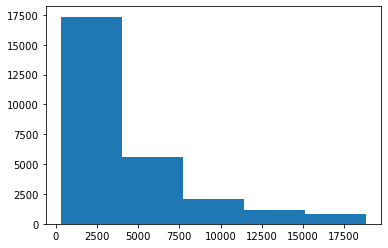

In [18]:
plt.hist(df_gems.price, bins = 5)

plt.show()

Text(0.5, 1.0, 'x Distribution')

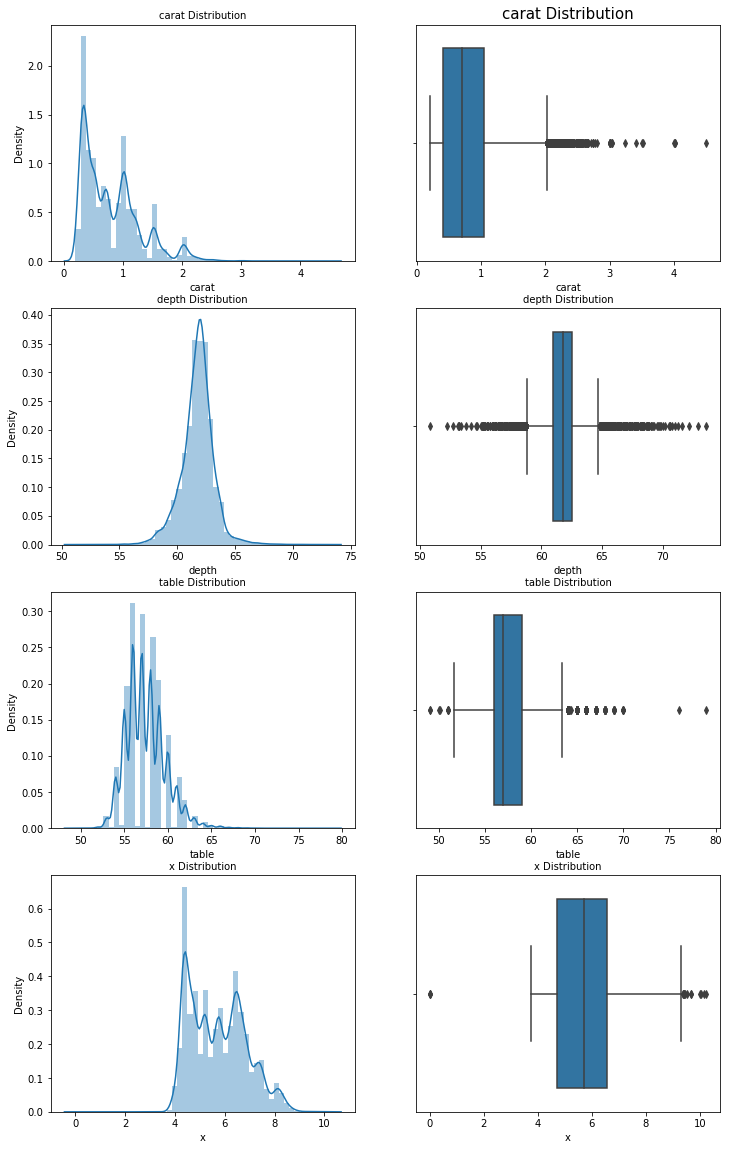

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df_gems['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df_gems['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df_gems['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df_gems['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df_gems['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df_gems['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df_gems['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(df_gems['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

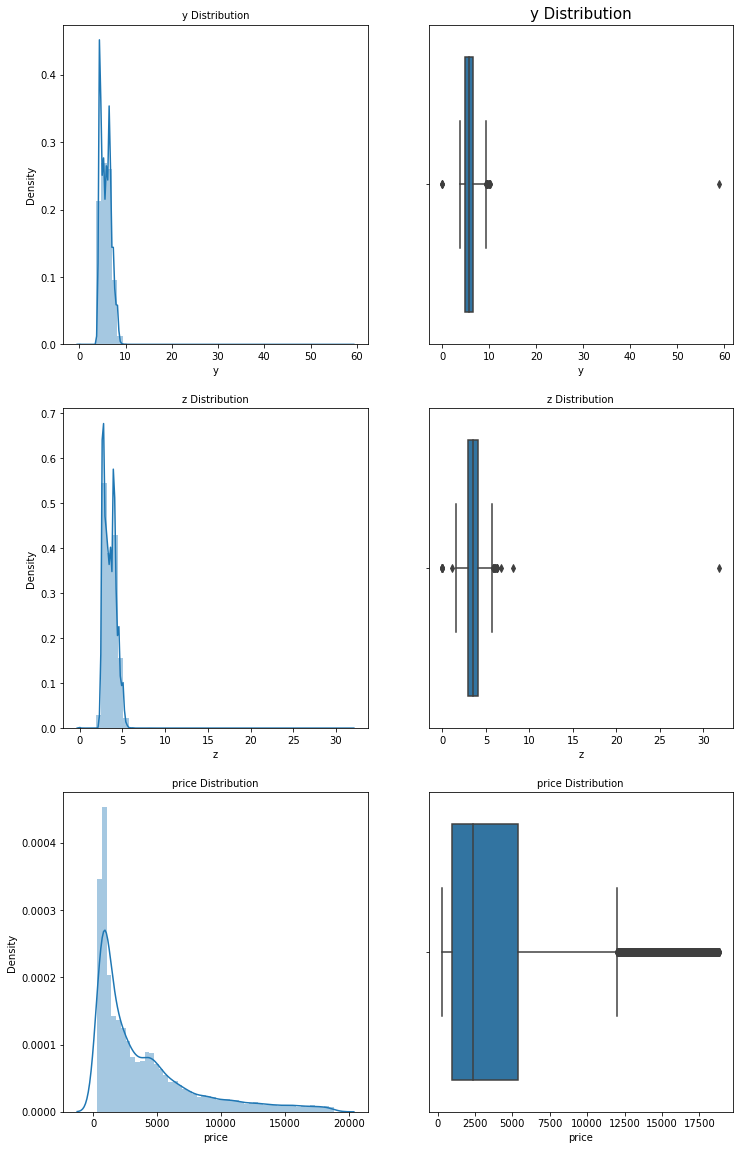

In [33]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

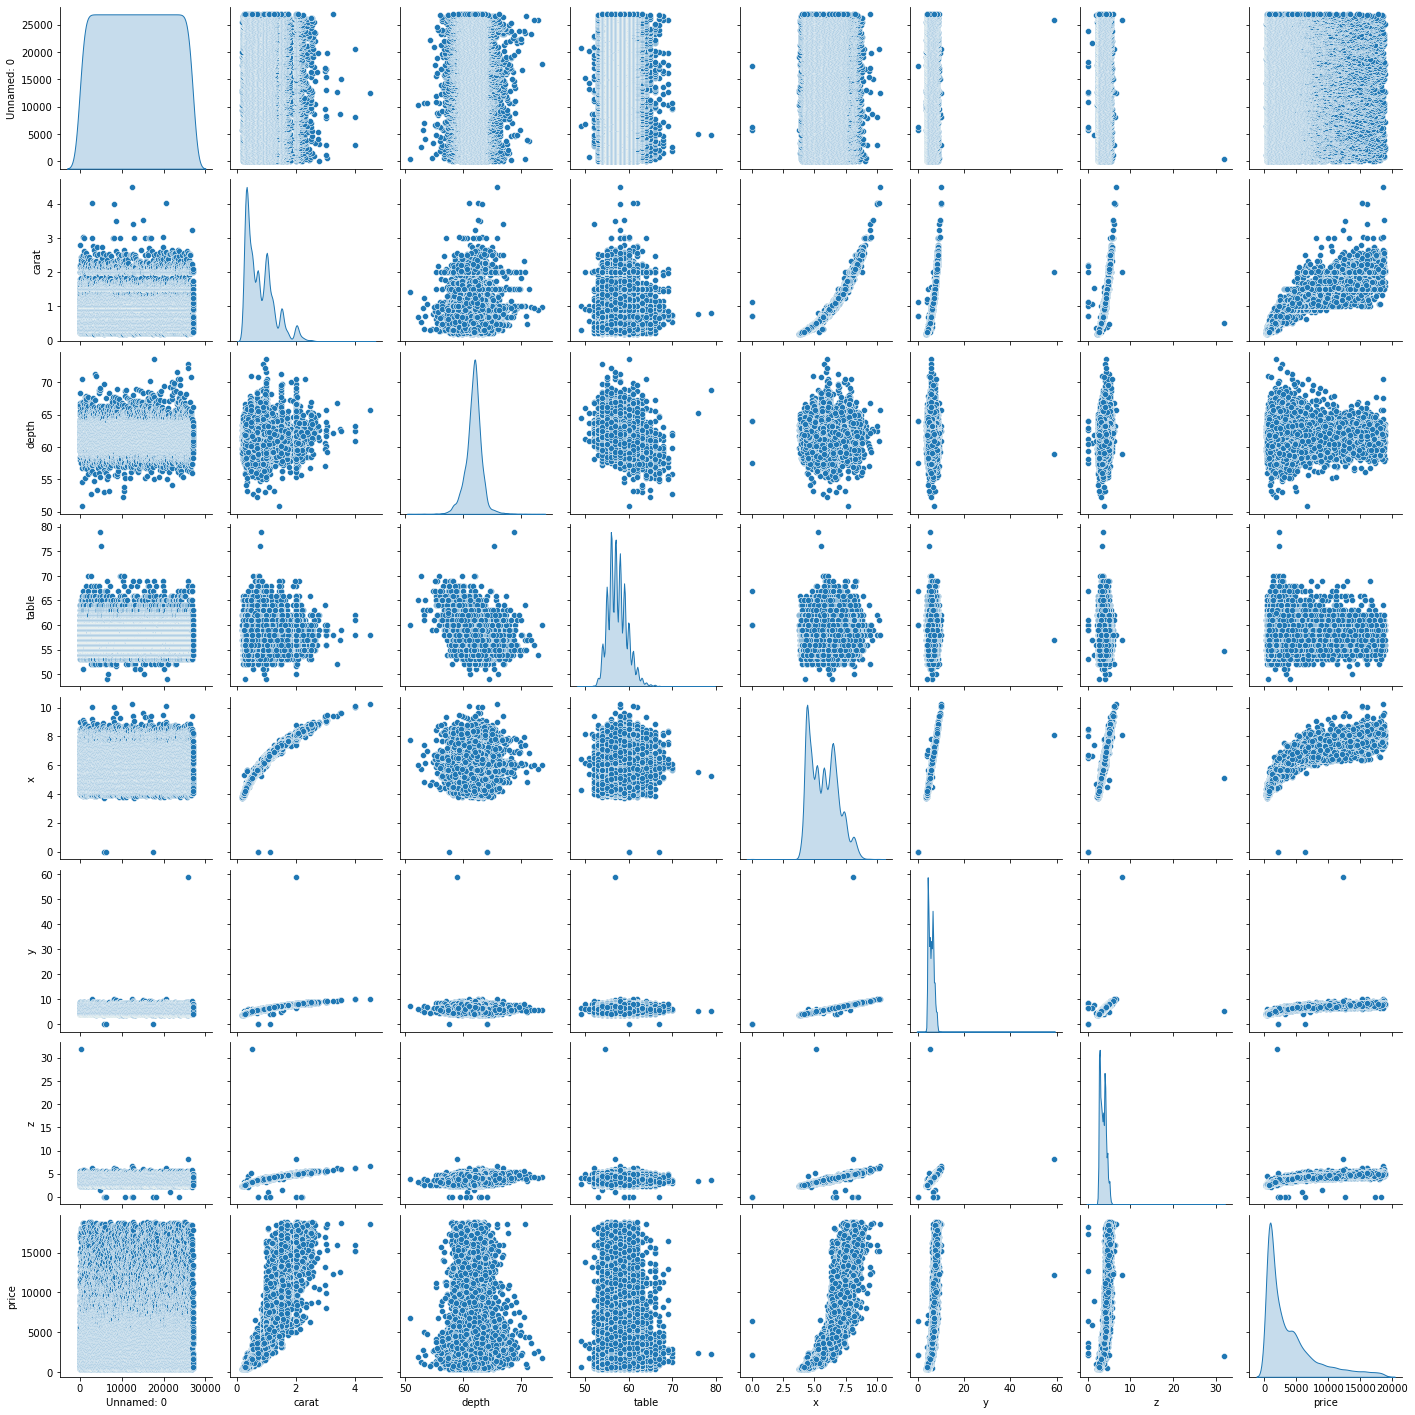

In [20]:
sns.pairplot(df_gems, diag_kind='kde')  
plt.show()

<AxesSubplot:>

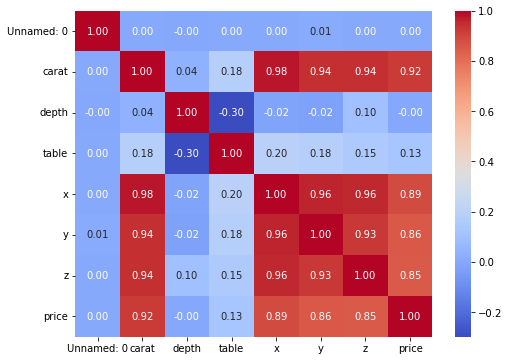

In [21]:
df_cor = df_gems.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

<AxesSubplot:xlabel='cut', ylabel='count'>

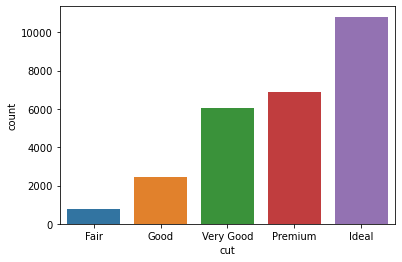

In [22]:
sns.countplot(df_gems['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

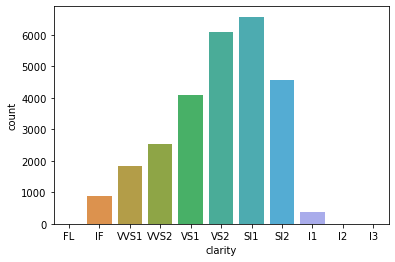

In [23]:
sns.countplot(df_gems['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:xlabel='color', ylabel='count'>

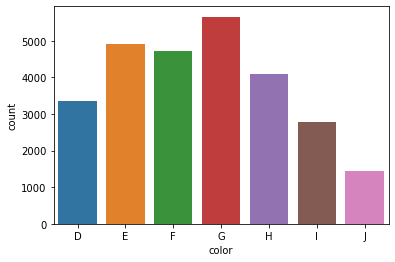

In [24]:
sns.countplot(df_gems['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

In [46]:
df_gems.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [25]:
df[df_gems.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [26]:
df_gems.loc[((df_gems['x'] == 0) | (df_gems['y'] == 0) | (df_gems['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [27]:
df_gems.drop(df_gems[((df['x'] == 0) | (df_gems['y'] == 0) | (df_gems['z'] == 0))].index, inplace=True)

In [28]:
df[df_gems.isin([0])].stack(0)

Series([], dtype: object)

In [30]:
for column in df.columns:
    if df_gems[column].dtype != 'object':
        median = df_gems[column].median()
        df_gems[column] = df_gems[column].fillna(median)    
        
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [31]:
df_gems.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_d = df_gems.select_dtypes(exclude=['object'])
df_gems[num_d.columns] = sc.fit_transform(num_d)

In [33]:
df_gems.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


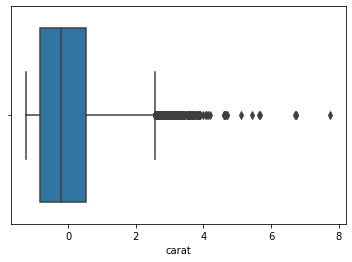

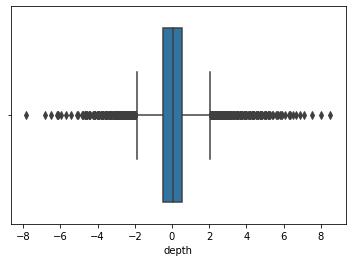

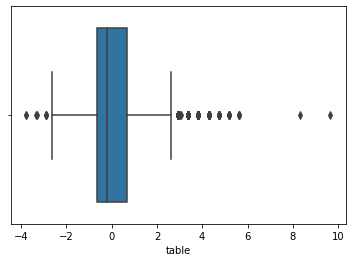

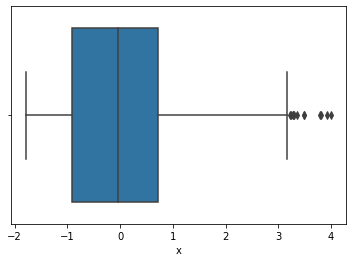

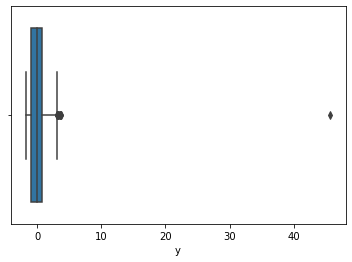

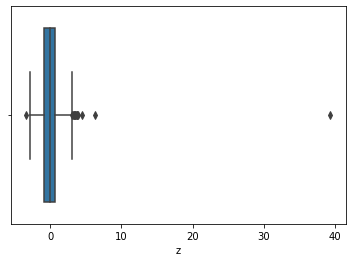

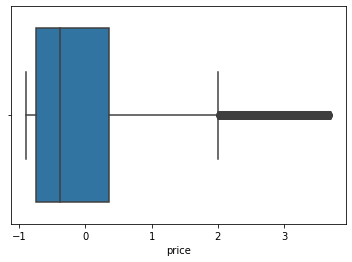

In [34]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df_gems[i])
    plt.show()

In [35]:
cont=df_gems.dtypes[(df_gems.dtypes!='uint8') & (df_gems.dtypes!='object')].index

In [57]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df_gems[column])
    df_gems[column]=np.where(df_gems[column]>ur,ur,df_gems[column])
    df_gems[column]=np.where(df_gems[column]<lr,lr,df_gems[column])

NameError: name 'remove_outlier' is not defined

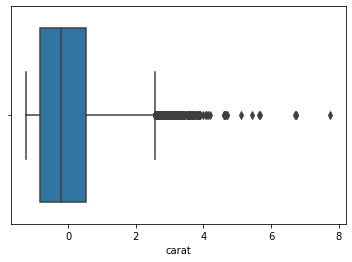

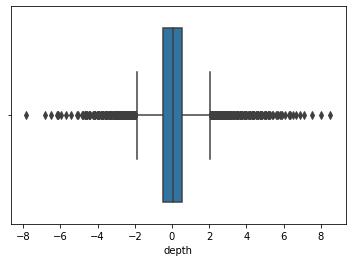

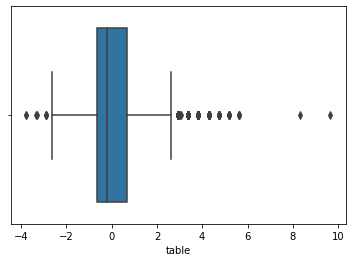

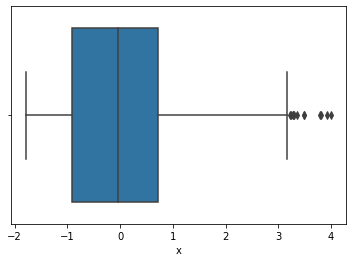

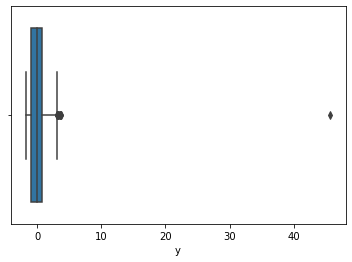

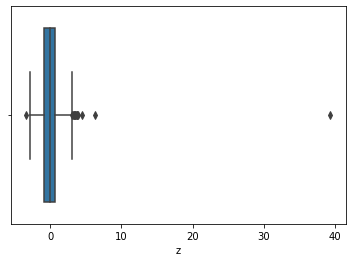

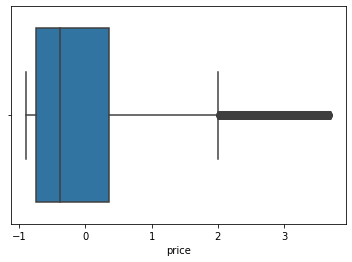

In [37]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df_gems[i])
    plt.show()

<AxesSubplot:>

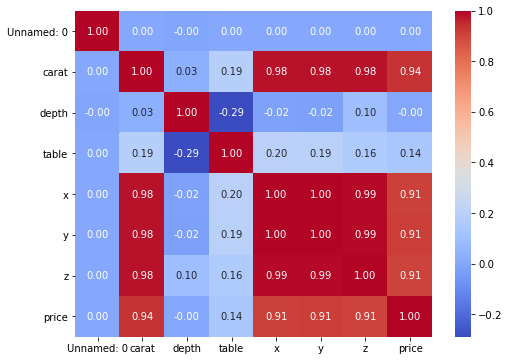

In [60]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [38]:
data = pd.get_dummies(df_gems, columns=['cut','color','clarity'],drop_first=True)

In [62]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [63]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [64]:
# drop the id column as it is useless for the model
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [65]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [66]:
data_model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
# Copy all the predictor variables into X dataframe
X = data_model.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data_model[['price']]

In [68]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
X.shape

(26958, 23)

In [70]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [71]:
y.shape

(26958, 1)

In [72]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [73]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [74]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804512
The coefficient for depth is 0.0056051434455706645
The coefficient for table is -0.013319500386804255
The coefficient for x is -0.3050434981963348
The coefficient for y is 0.30391448957926764
The coefficient for z is -0.13916571567988092
The coefficient for cut_Good is 0.09403402912977939
The coefficient for cut_Ideal is 0.1523107462056743
The coefficient for cut_Premium is 0.14852774839849367
The coefficient for cut_Very Good is 0.125838818784527
The coefficient for color_E is -0.04705442233369834
The coefficient for color_F is -0.06268437439142852
The coefficient for color_G is -0.10072161838356827
The coefficient for color_H is -0.207673133116617
The coefficient for color_I is -0.3239541927462753
The coefficient for color_J is -0.4685893027501587
The coefficient for clarity_IF is 0.9997691394634917
The coefficient for clarity_SI1 is 0.638978581827134
The coefficient for clarity_SI2 is 0.4295966234831559
The coefficient for clarity_VS1 

In [75]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.756762786304939


In [76]:
regression_model.score(X_train, y_train)

0.9419557931252712

In [77]:
regression_model.score(X_test, y_test)

0.9381643998102491

In [78]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20690072466418796

In [79]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21647817772382874

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [81]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598579
table ---> 1.7728852812618994
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.609618194943713
cut_Ideal ---> 14.34812508118844
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.371070464762613


In [82]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [83]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [84]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [85]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [86]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [87]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:18:59   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

In [88]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [89]:
import math
math.sqrt(mse)

0.21647817772382866

In [90]:
regression_model.score(X_test, y_test)

0.9381643998102491

In [91]:
y_pred = regression_model.predict(X_test)

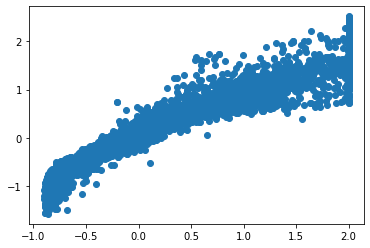

In [92]:
plt.scatter(y_test['price'], y_pred)

In [93]:
### ITERATION 2
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.756657
carat            1.101954
table           -0.013928
x               -0.315617
y                0.283420
z               -0.108789
cut_Good         0.095123
cut_Ideal        0.151173
cut_Premium      0.147355
cut_Very_Good    0.125514
color_E         -0.047114
color_F         -0.062727
color_G         -0.100657
color_H         -0.207568
color_I         -0.323689
color_J         -0.468428
clarity_IF       1.000046
clarity_SI1      0.639804
clarity_SI2      0.430195
clarity_VS1      0.838626
clarity_VS2      0.766683
clarity_VVS1     0.942390
clarity_VVS2     0.931898
dtype: float64

In [94]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:20:24   Log-Likelihood:                 2953.5
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18847   BIC:                            -5680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      0.016    -46.991

In [95]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [96]:
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
26809,0.443495,0.109928,-0.204081,0.559065,0.580741,0.572231,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.122708
10087,0.024729,0.038193,-1.100465,0.212920,0.254370,0.237888,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.082442
22817,-0.812804,0.181664,-0.652273,-0.852144,-0.793452,-0.793005,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.689067
21676,0.045667,0.396869,-0.652273,0.204044,0.245781,0.265750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.272740
14846,0.694754,0.683810,-0.204081,0.816456,0.812636,0.892644,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.642930


In [109]:
mse

price    0.046863
dtype: float64

In [115]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

price    0.216478
dtype: float64

In [117]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (-0.01) * table + (-0.32) * x + (0.28) * y + (-0.11) * z + (0.1) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 